<a href="https://colab.research.google.com/github/RozitaAbdoli/telecom_customer_defection/blob/main/ML_telecom_customer_defection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 2: Machine Learning


In [15]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Retrieve the dataset.

In [16]:
from google.colab import files
uploaded = files.upload()

Saving telecom_dataset.arff to telecom_dataset (1).arff


In [17]:
data_file="telecom_dataset.arff"
data=arff.loadarff(data_file)
df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    df[col] = df[col].str.decode('utf-8') #data is not read as string values from a file

One-hot encode (categorical to numeric) 

In [18]:
cat_cols=["State","Area Code", "Phone Number", "Inter Plan","VoiceMail Plan"]
# Create a copy of df
df_onehot=df.copy()
#convert  categorical variables to one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot

,Account Length,No of Vmail Mesgs,Total Day Min,Total Day calls,Total Day Charge,Total Evening Min,Total Evening Calls,Total Evening Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total Int Min,Total Int Calls,Total Int Charge,No of Calls Customer Service,Churn,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,...,Phone Number_421-2955,Phone Number_421-3226,Phone Number_421-3528,Phone Number_421-5994,Phone Number_421-6268,Phone Number_421-6694,Phone Number_421-7205,Phone Number_421-7214,Phone Number_421-7270,Phone Number_421-8141,Phone Number_421-8535,Phone Number_421-8537,Phone Number_421-9034,Phone Number_421-9144,Phone Number_421-9401,Phone Number_421-9752,Phone Number_421-9846,Phone Number_422-1471,Phone Number_422-1799,Phone Number_422-2571,Phone Number_422-3052,Phone Number_422-3454,Phone Number_422-4241,Phone Number_422-4394,Phone Number_422-4956,Phone Number_422-5264,Phone Number_422-5350,Phone Number_422-5865,Phone Number_422-5874,Phone Number_422-6685,Phone Number_422-6690,Phone Number_422-7728,Phone Number_422-8268,Phone Number_422-8333,Phone Number_422-8344,Phone Number_422-9964,Inter Plan_no,Inter Plan_yes,VoiceMail Plan_no,VoiceMail Plan_yes
0,107.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,FALSE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,137.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,FALSE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,84.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,FALSE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,75.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,FALSE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,118.0,0.0,223.4,98.0,37.98,220.6,101.0,18.75,203.9,118.0,9.18,6.3,6.0,1.70,0.0,FALSE,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,68.0,0.0,231.1,57.0,39.29,153.4,55.0,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,FALSE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3329,28.0,0.0,180.8,109.0,30.74,288.8,58.0,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,FALSE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3330,184.0,0.0,213.8,105.0,36.35,159.6,84.0,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0,FALSE,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3331,74.0,25.0,234.4,113.0,39.85,265.9,82.0,22.60,241.4,77.0,10.86,13.7,4.0,3.70,0.0,FALSE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


Train-test split

In [19]:
from sklearn.model_selection import train_test_split
class_col_name="Churn"
one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109) # 70% training, 30% test

1 - Naive Bayes 

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

#Train the model using the training set
nb.fit(X_train, y_train)

#Predict the response for test data set
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


Naive Bayes outputs

In [21]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  3406
Classes  ['FALSE' 'TRUE']
Number of records for classes  [2000.  333.]
Log prior probability for classes  [-0.15400781 -1.94676778]
Log conditional probability for each feature given a class
 [[-2.35240444 -4.81236658 -1.8039874  ... -9.66722848 -7.32471068
  -8.18058615]
 [-2.38746885 -5.36209714 -1.70638185 ... -8.24401576 -7.2151181
  -8.7786926 ]]


Evaluation metrics

In [22]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[758  92]
 [ 84  66]]
TP:  66 , FP:  92 , TN:  758 , FN: 84


In [23]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

       FALSE       0.90      0.89      0.90       850
        TRUE       0.42      0.44      0.43       150

    accuracy                           0.82      1000
   macro avg       0.66      0.67      0.66      1000
weighted avg       0.83      0.82      0.83      1000



2 - Decision Tree

class Names ['FALSE' 'TRUE']


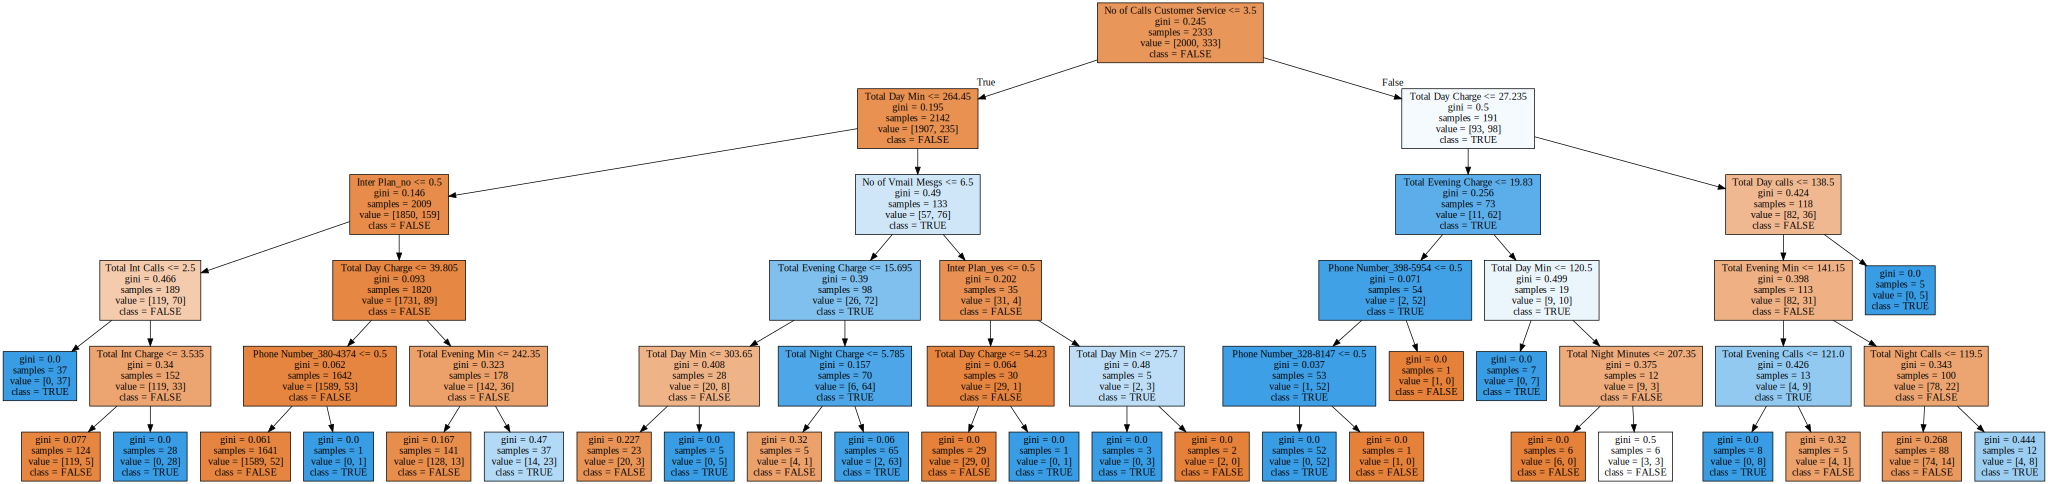

In [24]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)    #set max depth to 5
clf = clf.fit(X_train, y_train)
import graphviz
class_values=df_onehot[class_col_name].unique()   #unique class values to display on the tree
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=one_hot_feature_names,  
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [25]:
# Prediction on the test set
y_pred = clf.predict(X_test)

In [26]:
# Classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       FALSE       0.94      0.98      0.96       850
        TRUE       0.83      0.64      0.72       150

    accuracy                           0.93      1000
   macro avg       0.89      0.81      0.84      1000
weighted avg       0.92      0.93      0.92      1000

